In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read OI fraction data
T_OI = pd.read_csv('../data/processed/OI/T_OI_fraction.csv', index_col='Trading_Day', parse_dates=True)
TF_OI = pd.read_csv('../data/processed/OI/TF_OI_fraction.csv', index_col='Trading_Day', parse_dates=True)
TS_OI = pd.read_csv('../data/processed/OI/TS_OI_fraction.csv', index_col='Trading_Day', parse_dates=True)

In [3]:
delivery_info = pd.read_csv(r'..\data\raw\meta_data\delivery_info.csv', index_col=0, parse_dates=['intention_day', 'notice_day', 'delivery_day'], 
                      infer_datetime_format=True, keep_date_col=True)

In [4]:
TS_delivery_info = delivery_info[delivery_info.index.str.match('TS')]
TF_delivery_info = delivery_info[delivery_info.index.str.match('TF')]
T_delivery_info = delivery_info[~delivery_info.index.str.match('TS|TF')]

In [5]:
def find_next_contract(contract, contract_list):
    
    contract_sr = pd.Series(index=contract_list)
    
    if contract in contract_list and contract != contract_list[-1]:
        return contract_sr[contract:].index[1]
    else:
        return None

In [6]:
T_contract_list = list(T_delivery_info.index)
TF_contract_list = list(TF_delivery_info.index)

In [7]:
days_before_intention = [1, 6, 11, 16, 21]

In [24]:
plt.rcParams['figure.figsize'] = [10, 6]

# T

## Deferred contract

In [25]:
# get open interest of deferred contract 1, 6, 11, 16, 21 days before intention day
T_OI_deferred = pd.DataFrame(index=T_delivery_info.index, columns=days_before_intention)

for active_contract in T_delivery_info.index:
    
    deferred_contract = find_next_contract(active_contract, T_contract_list)
    intention_day = T_delivery_info.loc[active_contract, 'intention_day']
    
    if deferred_contract and (intention_day in list(T_OI.index)):

        sub_df = T_OI.loc[:intention_day, deferred_contract]

        for days in days_before_intention:
            T_OI_deferred.loc[deferred_contract, days] = sub_df.iloc[-1*(days+1)]
            
T_OI_deferred = T_OI_deferred.dropna(how='all')

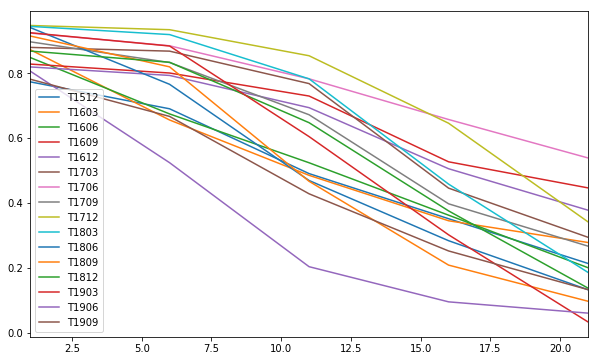

In [26]:
T_OI_deferred.T.plot()

In [27]:
T_OI_deferred.astype('float32').describe()

,1,6,11,16,21
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.874004,0.785013,0.600961,0.389153,0.234397
std,0.058294,0.113480,0.172195,0.150367,0.141370
min,0.774284,0.524996,0.204442,0.096064,0.034031
25%,0.826779,0.687209,0.482055,0.298161,0.133603
50%,0.876988,0.810912,0.626834,0.369839,0.207812
75%,0.924825,0.872796,0.740031,0.470849,0.306872
max,0.947982,0.934937,0.854640,0.658163,0.539564


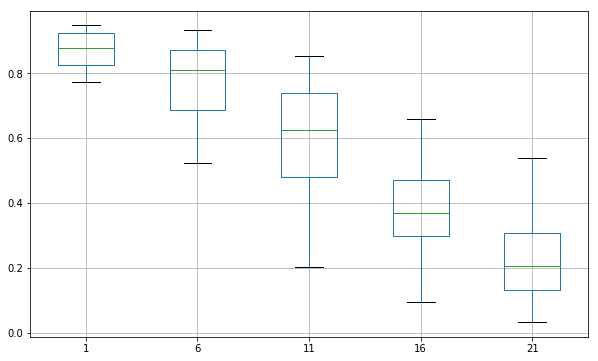

In [28]:
T_OI_deferred.astype('float32').boxplot()

## Active contract

In [22]:
# get open interest of active contract 1, 6, 11, 16, 21 days before intention day
T_OI_active = pd.DataFrame(index=T_delivery_info.index, columns=days_before_intention)

for active_contract in T_delivery_info.index:
    
    intention_day = T_delivery_info.loc[active_contract, 'intention_day']
    
    if active_contract and (intention_day in list(T_OI.index)):

        sub_df = T_OI.loc[:intention_day, active_contract]

        for days in days_before_intention:
            T_OI_active.loc[active_contract, days] = sub_df.iloc[-1*(days+1)]
            
T_OI_active = T_OI_active.dropna(how='all')

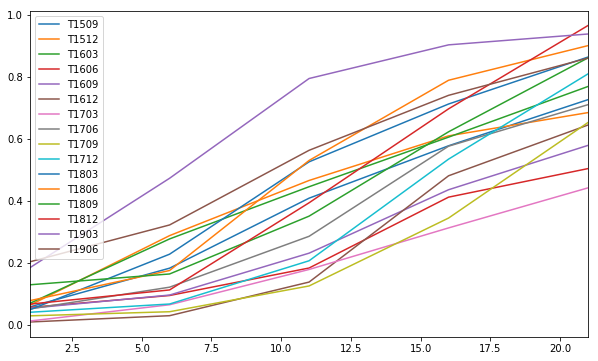

In [29]:
T_OI_active.T.plot()

In [30]:
T_OI_active.astype('float32').describe()

,1,6,11,16,21
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.073305,0.172164,0.364972,0.585195,0.744988
std,0.054999,0.120500,0.186438,0.162286,0.154174
min,0.010420,0.030668,0.126476,0.313538,0.442665
25%,0.047912,0.088849,0.201821,0.470294,0.651336
50%,0.058282,0.143821,0.372988,0.592144,0.748137
75%,0.072920,0.241147,0.481431,0.701140,0.862223
max,0.204442,0.473505,0.794994,0.903430,0.965913


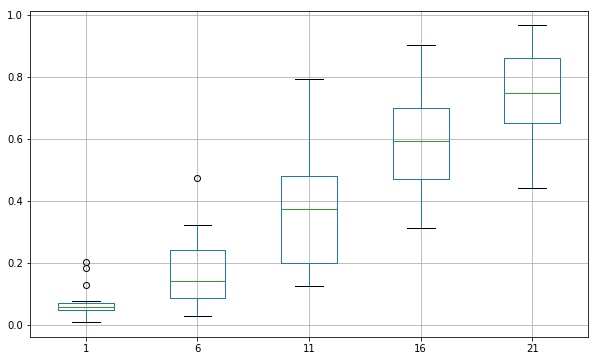

In [31]:
T_OI_active.astype('float32').boxplot()

# TF

## Deferred contract

In [32]:
# get open interest of deferred contract 1, 6, 11, 16, 21 days before intention day
TF_OI_deferred = pd.DataFrame(index=TF_delivery_info.index, columns=days_before_intention)

for active_contract in TF_delivery_info.index:
    
    deferred_contract = find_next_contract(active_contract, TF_contract_list)
    intention_day = TF_delivery_info.loc[active_contract, 'intention_day']
    
    if deferred_contract and (intention_day in list(TF_OI.index)):

        sub_df = TF_OI.loc[:intention_day, deferred_contract]

        for days in days_before_intention:
            TF_OI_deferred.loc[deferred_contract, days] = sub_df.iloc[-1*(days+1)]
            
TF_OI_deferred = TF_OI_deferred.dropna(how='all')

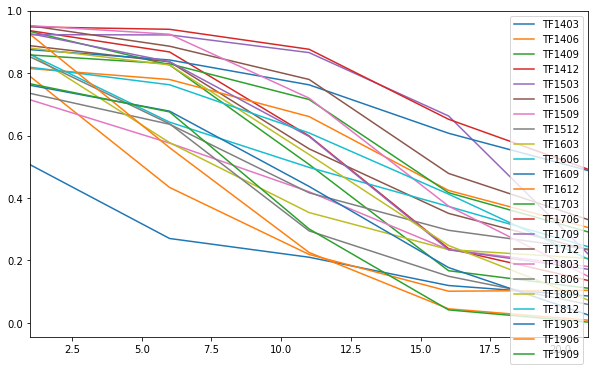

In [33]:
TF_OI_deferred.T.plot()

In [34]:
TF_OI_deferred.astype('float32').describe()

,1,6,11,16,21
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.846544,0.728878,0.528789,0.306078,0.189719
std,0.103247,0.169749,0.204211,0.180170,0.132565
min,0.506632,0.270342,0.210337,0.041724,0.002588
25%,0.801714,0.636828,0.384992,0.172191,0.095403
50%,0.861630,0.779232,0.539218,0.247926,0.180777
75%,0.925053,0.839043,0.687940,0.414681,0.240054
max,0.951749,0.939974,0.876045,0.662569,0.491973


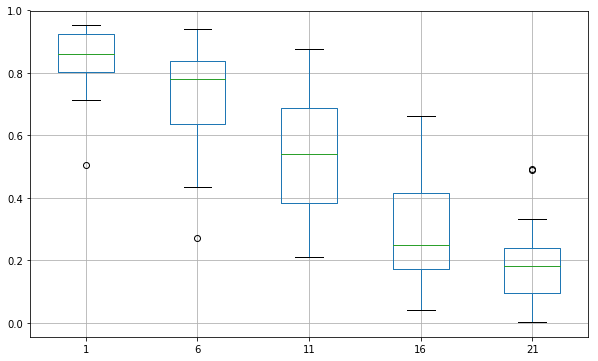

In [35]:
TF_OI_deferred.astype('float32').boxplot()

## Active contract

In [37]:
# get open interest of active contract 1, 6, 11, 16, 21 days before intention day
TF_OI_active = pd.DataFrame(index=TF_delivery_info.index, columns=days_before_intention)

for active_contract in TF_delivery_info.index:
    
    intention_day = TF_delivery_info.loc[active_contract, 'intention_day']
    
    if active_contract and (intention_day in list(TF_OI.index)):

        sub_df = TF_OI.loc[:intention_day, active_contract]

        for days in days_before_intention:
            TF_OI_active.loc[active_contract, days] = sub_df.iloc[-1*(days+1)]
            
TF_OI_active = TF_OI_active.dropna(how='all')

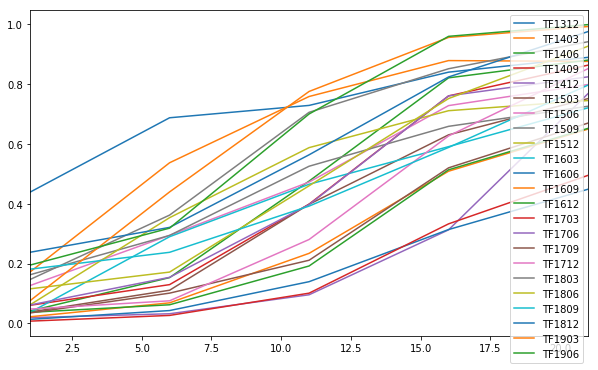

In [38]:
TF_OI_active.T.plot()## reverse

In [41]:
TF_OI_active.astype('float32').describe()

,1,6,11,16,21
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.101544,0.228669,0.436803,0.670392,0.792057
std,0.099255,0.172596,0.212450,0.190781,0.145320
min,0.007751,0.026820,0.095726,0.312520,0.448064
25%,0.037022,0.088376,0.257099,0.553477,0.722385
50%,0.061560,0.171494,0.459470,0.710111,0.797435
75%,0.154633,0.319385,0.574880,0.821278,0.883615
max,0.438293,0.686527,0.774326,0.958276,0.997412


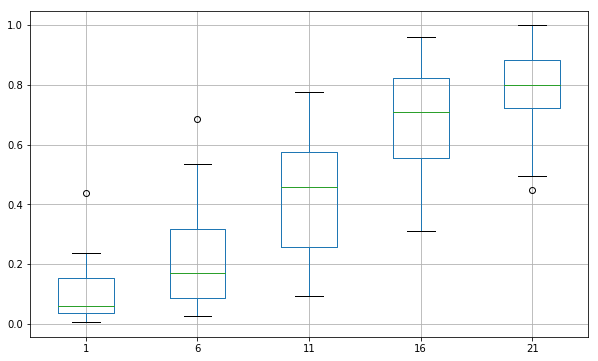

In [42]:
TF_OI_active.astype('float32').boxplot()